<div align="center">

# 🌟TASK 4

## [Apoorv Gupta](https://www.linkedin.com/in/er-apoorv-gupta/)
### 🧠 Data Science Intern @ Astric Technocrats


</div>

In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

### Information about the Dataset

In [31]:
# loading Dataset
df = pd.read_csv('Instagram-Reach.csv')
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


### Reformatting the 'Date' column

In [32]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove the time part from the 'Date' column
df['Date'] = df['Date'].dt.date

df

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532
...,...,...
360,2023-03-27,15622
361,2023-03-28,18645
362,2023-03-29,41238
363,2023-03-30,50490


In [33]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a line plot using Plotly
fig = px.line(df, x='Date', y='Instagram reach', title='Instagram Reach Over Time')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Instagram Reach')

# Set the figure layout
fig.update_layout(
    title_text='<b>Instagram reach Analysis</b>',
    title_font=dict(size=24, color='purple'),
    font=dict(size=12, color='black'),
    height=600,
    width=900,
    showlegend=False,
)

fig.show()

In [34]:
df

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532
...,...,...
360,2023-03-27,15622
361,2023-03-28,18645
362,2023-03-29,41238
363,2023-03-30,50490


<br>

<div align="center">

# <span style="color: purple; font-size: 56px; font-weight: bold;">ARIMA for time series Data Prediction </span>

</div>


C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



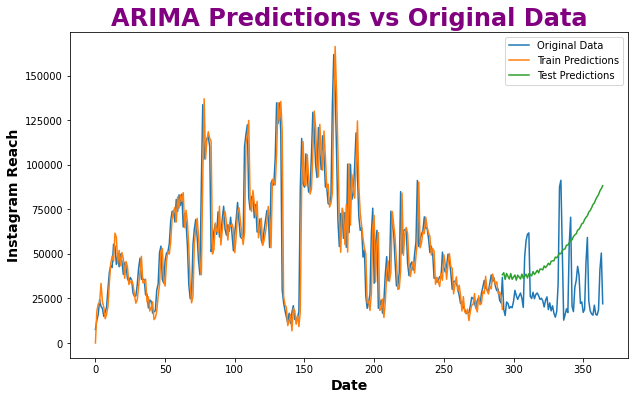

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your dataframe has 'date' as the index and 'instagram_reach' as the column for reach data

# Split the dataset into train and test sets
split_date = df.index[int(len(df) * 0.8)]
train_data = df.loc[:split_date]
test_data = df.loc[split_date:]

# Fit ARIMA model
model = ARIMA(train_data['Instagram reach'], order=(2,3,4))
model_fit = model.fit()

# Make predictions for the train dataset
train_predictions = model_fit.predict(start=0, end=len(train_data)-1)

# Make predictions for the test dataset
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plot original data, predictions for train dataset, and predictions for test dataset
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Instagram reach'], label='Original Data')
plt.plot(train_data.index, train_predictions, label='Train Predictions')
plt.plot(test_data.index, test_predictions, label='Test Predictions')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Instagram Reach', fontsize=14, fontweight='bold')
plt.title('ARIMA Predictions vs Original Data', fontsize=24, fontweight='bold', color='purple')
plt.legend()
plt.show()

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

# Assuming your dataframe has 'date' as the index and 'instagram_reach' as the column for reach data
# Split the dataset into train and test sets
split_date = df.index[int(len(df) * 0.8)]
train_data = df.loc[:split_date]
test_data = df.loc[split_date:]

# Define the parameter grid for order
p_values = range(0, 11)  
d_values = range(0, 3) 
q_values = range(0, 11)  
parameter_grid = {'p': p_values, 'd': d_values, 'q': q_values}

# Initialize variables to store best parameters and lowest AIC
best_aic = float("inf")
best_params = None

# Grid search for finding optimal order parameters
for params in ParameterGrid(parameter_grid):
    try:
        model = ARIMA(train_data['Instagram reach'], order=(params['p'], params['d'], params['q']))
        model_fit = model.fit()

        # Calculate AIC (Akaike Information Criterion)
        aic = model_fit.aic

        if aic < best_aic:
            best_aic = aic
            best_params = params

    except:
        continue

# Fit the ARIMA model with the best parameters
model = ARIMA(train_data['Instagram reach'], order=(best_params['p'], best_params['d'], best_params['q']))
model_fit = model.fit()

# Make predictions for the train dataset
train_predictions = model_fit.predict(start=0, end=len(train_data)-1)

# Make predictions for the test dataset
test_predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Print the best parameters and lowest AIC
print("Best Parameters:", best_params)
print("Lowest AIC:", best_aic)

C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\erapo\AppData\Roaming\

Best Parameters: {'d': 2, 'p': 3, 'q': 4}
Lowest AIC: 6463.814442833258


C:\Users\erapo\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<br><br><div align="center">

# <span style="color: purple; font-size: 56px; font-weight: bold;">LSTM for time series Data Prediction </span>

</div>

In [37]:
# LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming your dataset is stored in a DataFrame called 'df'
# Assuming your Date column is named 'Date' and reach column is named 'instagram_reach'
df['Date'] = pd.to_datetime(df['Date'])

# Extract the reach data
reach_data = df['Instagram reach'].values

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(reach_data.reshape(-1, 1))

# Split the dataset into train and test sets
split_index = int(len(normalized_data) * 0.8)
train_data = normalized_data[:split_index]
test_data = normalized_data[split_index:]

# Prepare the data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data)-time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps to consider
X_train, y_train = prepare_data(train_data, time_steps)
X_test, y_test = prepare_data(test_data, time_steps)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the predicted and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))



2/2 [==============================] - 0s 3ms/step


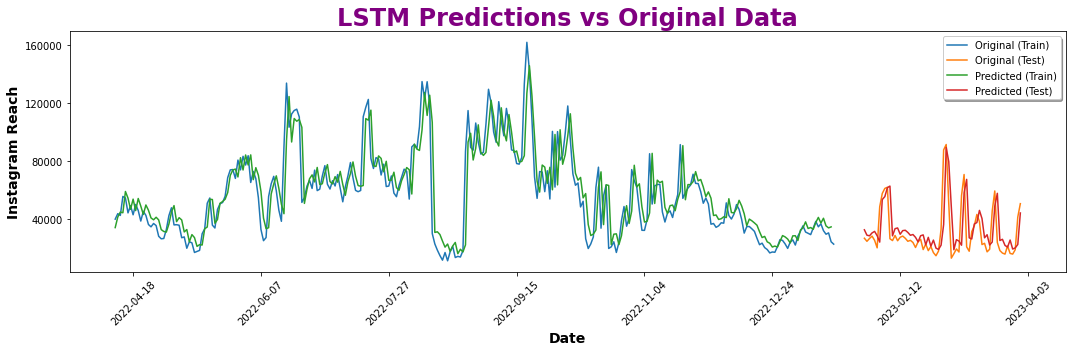

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_train and y_test to DataFrames and remove the last value
y_train_df = pd.DataFrame(y_train[:-1])
y_test_df = pd.DataFrame(y_test[:-1])

# Set the figure size
plt.figure(figsize=(15, 5))

# Plotting the original data
plt.plot(df['Date'].iloc[time_steps:time_steps+split_index+1].values[:len(y_train)], y_train.ravel(), label='Original (Train)')
plt.plot(df['Date'].iloc[time_steps+split_index+1:time_steps+split_index+1+len(y_test_df)].values, y_test_df.values.ravel(), label='Original (Test)')

# Plotting the predicted data for train and test
plt.plot(df['Date'].iloc[time_steps:time_steps+split_index+1].values[:len(y_train_df)], train_predictions[:-1].ravel(), label='Predicted (Train)')
plt.plot(df['Date'].iloc[time_steps+split_index+1:time_steps+split_index+1+len(y_test_df)].values, test_predictions[:-1].ravel(), label='Predicted (Test)')

# Customize tick labels
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

# Adding labels and title
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Instagram Reach', fontsize=14, fontweight='bold')
plt.title('LSTM Predictions vs Original Data', fontsize=24, fontweight='bold', color='purple')

legend = plt.legend(frameon=True, shadow=True)

for line in legend.get_lines():
    line.set_linewidth(1.5)

plt.tight_layout()
plt.show()
